In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [38]:
def plot(y, color='blue', isShow=True, isFigsize=True):
    if isFigsize:
        plt.figure(figsize=(20, 2))
    nx = len(y)
    plt.plot( np.arange(nx),  y, color)
    if isShow:
        plt.show()

In [30]:
def get_norm_v2(x):
    M1 = np.max(x[:, 0])
    M2 = np.max(x[:, 1])
    M3 = np.max(x[:, 2])
    x2 = np.copy(x)
    M =  np.mean(np.abs(x))
    x2[:, 0] /= M
    x2[:, 1] /= M
    x2[:, 2] /= M
    return x2

def preprocessing_data(xs, N=12000, M=2):
    a = np.arange(0, N, M)
    print(N//M)
    xsa = xs[:, a, :]

    for i in tqdm(range(1, M)):
        xsa = xsa + xs[:, a+i, :]

    for i in tqdm(range(len(xsa))):
        xsa[i] = get_norm_v2(xsa[i])
    return xsa

In [32]:
Xs6 = np.load('data/Bank/xs_train_data600.npy')

#Transpose if data not in (numData, timestep, Channel)
# Xs = []
# for i in range(Xs6.shape[0]):
#   Xs.append(Xs6[i].T)
# Xs = np.array(Xs)

Xs6 =   preprocessing_data(Xs6)
np.save('Bank_Mean_x_denoise_600rpm.npy', Xs6)
Xs6 = None
Xs = None


6000


100%|██████████| 29000/29000 [00:06<00:00, 4238.39it/s]


In [33]:
Xs12 = np.load('data/Bank/xs_train_data1200.npy')

#Transpose if data not in (numData, timestep, Channel)
# Xs = []
# for i in range(Xs12.shape[0]):
#   Xs.append(Xs12[i].T)
# Xs = np.array(Xs)

Xs12 =   preprocessing_data(Xs12)
np.save('data/Bank/Bank_Mean_x_denoise_1200rpm.npy', Xs12)
Xs12 = None
Xs = None

6000


100%|██████████| 29000/29000 [00:06<00:00, 4220.18it/s]


In [45]:
from tqdm import tqdm
def multiLabeling(label):
  label = str(label)
  if(label == '0'):
    return '0 0 0'.split(" ")
  if(label == '1'):
    return '1 0 0'.split(" ")
  if(label == '2'):
    return '2 0 0'.split(" ")
  if(label == '3'):
    return '3 0 0'.split(" ")
  if(label == '4'):
    return '0 1 0'.split(" ")
  if(label == '5'):
    return '0 2 0'.split(" ")
  if(label == '6'):
    return '0 3 0'.split(" ")
  if(label == '7'):
    return '0 0 1'.split(" ")
  if(label == '8'):
    return '0 0 2'.split(" ")
  if(label == '9'):
    return '0 0 3'.split(" ")
  if(label == '10'):
    return '0 0 4'.split(" ")
  if(label == '11'):
    return '1 1 0'.split(" ")
  if(label == '12'):
    return '2 1 0'.split(" ")
  if(label == '13'):
    return '3 1 0'.split(" ")
  if(label == '14'):
    return '1 2 0'.split(" ")
  if(label == '15'):
    return '2 2 0'.split(" ")
  if(label == '16'):
    return '3 2 0'.split(" ")
  if(label == '17'):
    return '1 3 0'.split(" ")
  if(label == '18'):
    return '2 3 0'.split(" ")
  if(label == '19'):
    return '3 3 0'.split(" ")
  if(label == '20'):
    return '1 0 1'.split(" ")
  if(label == '21'):
    return '2 0 1'.split(" ")
  if(label == '22'):
    return '3 0 1'.split(" ")
  if(label == '23'):
    return '1 0 2'.split(" ")
  if(label == '24'):
    return '2 0 2'.split(" ")
  if(label == '25'):
    return '3 0 2'.split(" ")
  if(label == '26'):
    return '1 0 3'.split(" ")
  if(label == '27'):
    return '2 0 3'.split(" ")
  if(label == '28'):
    return '3 0 3'.split(" ")
  else:
    return label

y1 = []
y2 = []
y3 = []
Xs = []

ys = np.load('data/Bank/ys_train_data600.npy')

for i in tqdm(range(len(ys))):
  Y = multiLabeling(ys[i])
  y1.append(Y[0])
  y2.append(Y[1])
  y3.append(Y[2])

for n in tqdm(range(len(ys))):
  Y = multiLabeling(ys[n])
  y1.append(Y[0])
  y2.append(Y[1])
  y3.append(Y[2])



100%|██████████| 29000/29000 [00:00<00:00, 572932.97it/s]


In [42]:
Xs6 = np.load('data/Bank/Bank_Mean_x_denoise_600rpm.npy')
Xs12 = np.load('data/Bank/Bank_Mean_x_denoise_1200rpm.npy')

In [43]:
Xs = np.concatenate([Xs6, Xs12])
Xs.shape

(58000, 6000, 3)

In [44]:
np.save('data/Bank/Bank_Mean_x_denoise_600_1200rpm_Multilabel.npy', Xs)

In [8]:
Xs6 = None
Xs12 = None

In [46]:
df_train600 = pd.DataFrame(list(zip(y1, y2, y3)),
               columns =['y1', 'y2', 'y3'])
df_train600

,y1,y2,y3
0,0,0,4
1,1,0,3
2,1,2,0
3,0,1,0
4,0,0,2
...,...,...,...
57995,1,2,0
57996,2,0,2
57997,0,0,3
57998,3,3,0


In [47]:
ys = df_train600[['y1', 'y2', 'y3']]
ys = ys.to_numpy().astype('int64')
ys

array([[0, 0, 4],
       [1, 0, 3],
       [1, 2, 0],
       ...,
       [0, 0, 3],
       [3, 3, 0],
       [0, 0, 4]])

In [48]:
np.save('data/Bank/Bank_Mean_y_denoise_600_1200rpm_Multilabel.npy', ys)

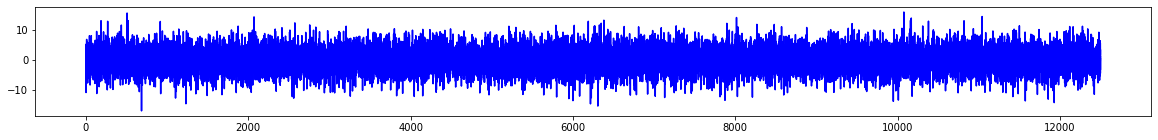

In [39]:
plot(Xs6[0])